### data normalization   


In [1]:
import os
import numpy as np
from glob import glob
import rasterio as rio
from notebooks import config
import matplotlib.pyplot as plt
from utils.utils import get_lat


In [2]:
### secene and truth pairwise data
paths_truth = sorted(glob('data/dset/truth/*.tif'))
paths_scene = [path.replace('truth','scene') for path in paths_truth]
paths_dem = [path.replace('.tif', '_dem.tif').replace('truth','dem') for path in paths_truth]
paths_scene[0]  


'data/dset/scene/l5_scene_01.tif'

In [3]:
def normalize_scene(image, max_bands, min_bands):
    '''
    des: normalize each band of the image to [0, 1]
    args:
        image: H*W*C, numpy array
        max_bands: list of max values for each band (or single value for all bands)
        min_bands: list of min values for each band (or single value for all bands)
    '''
    if isinstance(max_bands, (int, float)):
        max_bands = [max_bands] * image.shape[-1]  
    if isinstance(min_bands, (int, float)):
        min_bands = [min_bands] * image.shape[-1]         
    ## normalization
    min_bands_arr = np.array(min_bands).reshape(1, 1, -1)
    max_bands_arr = np.array(max_bands).reshape(1, 1, -1)
    normalized = (image.astype(float) - min_bands_arr) \
                     / (max_bands_arr - min_bands_arr + 1e-6)
    return np.clip(normalized, 0.0, 1.0)  


#### (1) normalization for satellite image

In [4]:
for path_scene in paths_scene:
    path_save = path_scene.replace('.tif', '_nor.tif')
    scene_sat = path_scene.split('/')[-1].split('_')[0]
    scene_rio = rio.open(path_scene)
    profile = scene_rio.profile.copy()
    profile.update(dtype='float32') 
    scene_nor = normalize_scene(image=scene_rio.read(), 
                                max_bands=config.max_scenes[scene_sat], 
                                min_bands=config.min_scenes[scene_sat])
    # write to disk
    if os.path.exists(path_save): os.remove(path_save)
    with rio.open(path_save, 'w', **profile) as dst:
        dst.write(scene_nor.astype('float32'))
    print(f'Wrote normalized scene to: {path_save}')
    break 


Wrote normalized scene to: data/dset/scene/l5_scene_01_nor.tif


#### (2) normalization for dem

In [5]:
## normalize dem
for path_dem in paths_dem:
    path_save = path_dem.replace('.tif', '_nor.tif')
    dem_rio = rio.open(path_dem)
    profile = dem_rio.profile.copy()
    profile.update(dtype='float32') 
    dem_nor = normalize_scene(image=dem_rio.read(), 
                                max_bands=config.max_dem, 
                                min_bands=config.min_dem)
    # write to disk
    if os.path.exists(path_save): os.remove(path_save)
    with rio.open(path_save, 'w', **profile) as dst:
        dst.write(dem_nor.astype('float32'))
    print(f'Wrote normalized scene to: {path_save}')
    # break 


Wrote normalized scene to: data/dset/dem/l5_scene_01_dem_nor.tif
Wrote normalized scene to: data/dset/dem/l5_scene_02_dem_nor.tif
Wrote normalized scene to: data/dset/dem/l5_scene_03_dem_nor.tif
Wrote normalized scene to: data/dset/dem/l5_scene_04_dem_nor.tif
Wrote normalized scene to: data/dset/dem/l5_scene_05_dem_nor.tif
Wrote normalized scene to: data/dset/dem/l5_scene_06_dem_nor.tif
Wrote normalized scene to: data/dset/dem/l5_scene_07_dem_nor.tif
Wrote normalized scene to: data/dset/dem/l5_scene_08_dem_nor.tif
Wrote normalized scene to: data/dset/dem/l5_scene_09_dem_nor.tif
Wrote normalized scene to: data/dset/dem/l5_scene_10_dem_nor.tif
Wrote normalized scene to: data/dset/dem/l5_scene_11_dem_nor.tif
Wrote normalized scene to: data/dset/dem/l5_scene_12_dem_nor.tif
Wrote normalized scene to: data/dset/dem/l5_scene_13_dem_nor.tif
Wrote normalized scene to: data/dset/dem/l7_scene_01_dem_nor.tif
Wrote normalized scene to: data/dset/dem/l7_scene_02_dem_nor.tif
Wrote normalized scene to

#### normalize the adjusted dem

In [6]:
for path_dem in paths_dem:
    path_save = path_dem.replace('.tif', '_adjust_nor.tif')
    with rio.open(path_dem) as dem_rio:
        profile = dem_rio.profile.copy()
        dem_lat = get_lat(dem_rio)
        dem_adjust_arr = np.sin(np.deg2rad(abs(dem_lat))) * dem_rio.read()
    profile.update(dtype='float32') 
    dem_nor = normalize_scene(image=dem_adjust_arr, 
                                max_bands=config.max_dem, 
                                min_bands=config.min_dem)
    # write to disk
    if os.path.exists(path_save): os.remove(path_save)
    with rio.open(path_save, 'w', **profile) as dst:
        dst.write(dem_nor.astype('float32'))
    print(f'Wrote normalized scene to: {path_save}')
    # break 



Wrote normalized scene to: data/dset/dem/l5_scene_01_dem_adjust_nor.tif
Wrote normalized scene to: data/dset/dem/l5_scene_02_dem_adjust_nor.tif
Wrote normalized scene to: data/dset/dem/l5_scene_03_dem_adjust_nor.tif
Wrote normalized scene to: data/dset/dem/l5_scene_04_dem_adjust_nor.tif
Wrote normalized scene to: data/dset/dem/l5_scene_05_dem_adjust_nor.tif
Wrote normalized scene to: data/dset/dem/l5_scene_06_dem_adjust_nor.tif
Wrote normalized scene to: data/dset/dem/l5_scene_07_dem_adjust_nor.tif
Wrote normalized scene to: data/dset/dem/l5_scene_08_dem_adjust_nor.tif
Wrote normalized scene to: data/dset/dem/l5_scene_09_dem_adjust_nor.tif
Wrote normalized scene to: data/dset/dem/l5_scene_10_dem_adjust_nor.tif
Wrote normalized scene to: data/dset/dem/l5_scene_11_dem_adjust_nor.tif
Wrote normalized scene to: data/dset/dem/l5_scene_12_dem_adjust_nor.tif
Wrote normalized scene to: data/dset/dem/l5_scene_13_dem_adjust_nor.tif
Wrote normalized scene to: data/dset/dem/l7_scene_01_dem_adjust_

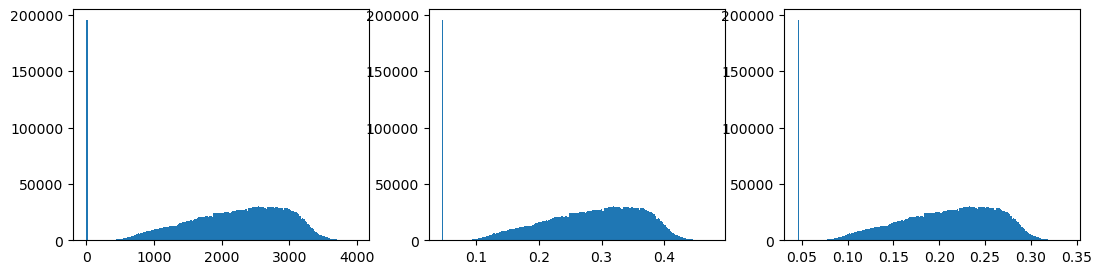

In [7]:
fig, ax = plt.subplots(1, 3, figsize=(13, 3))
id_scene = 7
dem_rio = rio.open(paths_dem[id_scene])
dem_nor_rio = rio.open(paths_dem[id_scene].replace('.tif', '_nor.tif'))
dem_adjust_nor_rio = rio.open(paths_dem[id_scene].replace('.tif', '_adjust_nor.tif'))
ax[0].hist(dem_rio.read().flatten(), bins=200)
ax[1].hist(dem_nor_rio.read().flatten(), bins=200);  
ax[2].hist(dem_adjust_nor_rio.read().flatten(), bins=200);  

